In [143]:
import pandas as pd
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'arial',
        'size'   : 15}
matplotlib.rc('font', **font)
import seaborn as sns
sns.set(style = 'whitegrid', font_scale = 1.5)

### Define parameters

In [156]:
mu_year = 31 # substitutions per year, taken from Nextstrain's GISAID build on 8/7/2023
gen_time = 5.1/365 # generation time (5.1 days) in years, estimate taken from https://elifesciences.org/articles/70767
mu_gen = mu_year*gen_time
Ne = 10**3

### Load data

In [157]:
bloom_neher_2023 = pd.read_csv('../../data/fitness/bloom_neher_2023_aamut_fitness_all.csv')
dfe = bloom_neher_2023['delta_fitness'].values
del_dfe = -1*dfe[dfe<0] # Get only the negative fitnesses and take their absolute value

### Discretize delerious distribution of fitness effects

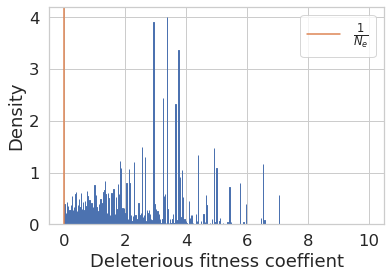

In [158]:
ds = 0.01
bins = np.arange(0, 10, ds)
rho_s, bins = np.histogram(del_dfe, bins, density = True)
s = bins[:-1] + ds/2
plt.hist(del_dfe, bins, density = True, edgecolor = 'b')
plt.plot([1/Ne, 1/Ne], [0, 4.2], label = '$\\frac{1}{N_e}$')
plt.ylim([0, 4.2])
plt.xlabel('Deleterious fitness coeffient')
plt.ylabel('Density')
plt.legend()
plt.show()

We see that the assumption that we are in the strong selection regime ($s>>1/N_e$) hold most of the density of the DFE is above $1/N_e$.

### Calculate the reduced effective population size over time ($N_e(t)$) taking into account balancing selection

From Nicholaisen and Desai, Genetics, 2013:

$N_e(t) = Nexp[-\int_0^{\infty}(1-e^{-st})^2\rho(s)ds]$

where:

$N$ = census population size

$\rho(s)$ = distribution of negative fitness effects (defined as s>0)

$t$ = time in generations backwards in time

In [159]:
t = np.arange(0,200,0.1)
s_trans = np.reshape(s, (len(s),1))
rho_s_trans = np.reshape(rho_s, (len(rho_s),1))
exponent = -1*np.sum((mu_gen/s_trans)*(1-np.exp(-s_trans*t))**2*rho_s_trans*ds, axis = 0)
Ne_corr = Ne*np.exp(exponent)

### Plot results

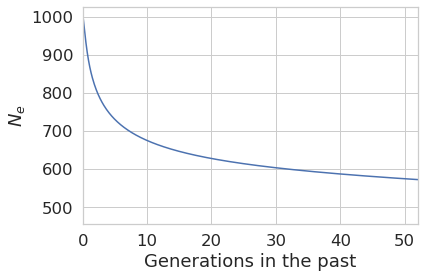

In [160]:
plt.plot(t, Ne_corr)
plt.xlabel('Generations in the past')
plt.ylabel('$N_e$')
plt.xlim([0, 52])
plt.show()

We see that the effective population size is reduced at most by a factor of about 2, and that is only at distant times in the past.